In [7]:
from PIL import Image 

import numpy as np 

img = Image.open('bird.png')

img.show()

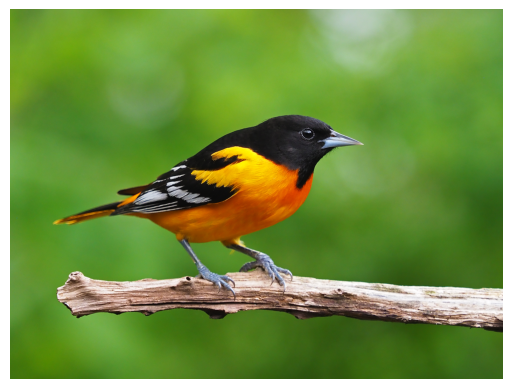

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('bird.png')

plt.imshow(data)
plt.axis('off')  
plt.show()

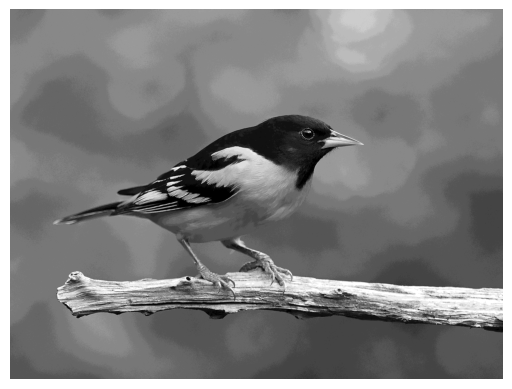

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt


data = iio.imread('bird.png')
if data.ndim == 3:
    
    data = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)


cl = data & 0xF0


iio.imwrite('birdf0.png', cl)


tmp = iio.imread('birdf0.png')
plt.imshow(tmp, cmap='gray')
plt.axis('off')
plt.show()

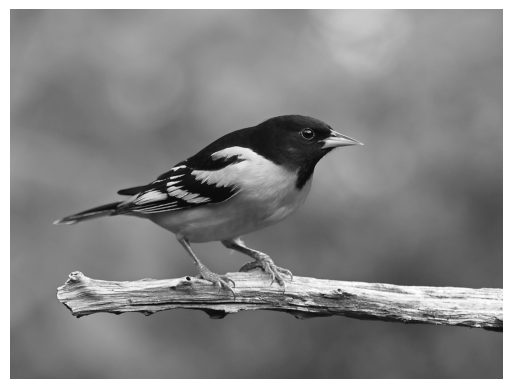

In [10]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt 
from skimage import color

rgb = iio.imread('bird.png')
gray = color.rgb2gray(rgb)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

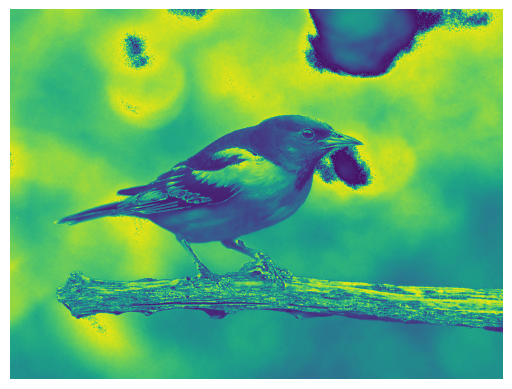

In [13]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt  

data = iio.imread('bird.png')

bdata = data[:, :, 1] + data[:, :, 2]

plt.axis('off')
plt.imshow(bdata)
plt.show()

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys

a = colorsys.rgb_to_hsv(1.0, 0.0, 0.0)
print("a:", a)

b = colorsys.rgb_to_hsv(1/255, 0.0, 0.0)
print("b:", b)

c = colorsys.rgb_to_hsv(0.0, 1.0, 0.0)
print("c:", c)

d = colorsys.hsv_to_rgb(1.0, 1.0, 1.0)
print("d:", d)

a: (0.0, 1.0, 1.0)
b: (0.0, 1.0, 0.00392156862745098)
c: (0.3333333333333333, 1.0, 1.0)
d: (1.0, 0.0, 0.0)


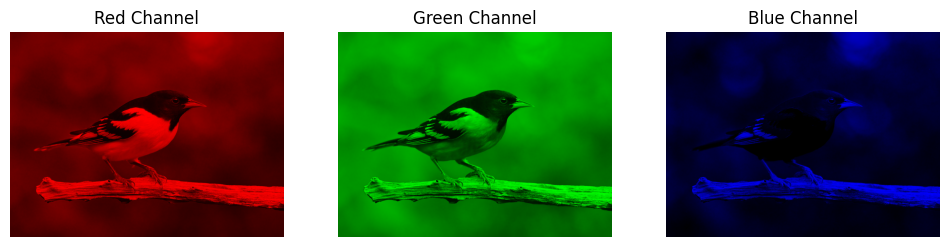

In [ ]:
#Cau 1

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = iio.imread('bird.png')  #

#Tách ảnh theo kênh màu R, G, B
red_img = np.zeros_like(img)
green_img = np.zeros_like(img)
blue_img = np.zeros_like(img)

red_img[:, :, 0] = img[:, :, 0]     
green_img[:, :, 1] = img[:, :, 1]   
blue_img[:, :, 2] = img[:, :, 2]    

#Lưu ảnh ra file
iio.imwrite('red.png', red_img)
iio.imwrite('green.png', green_img)
iio.imwrite('blue.png', blue_img)

# (Tùy chọn) Hiển thị để kiểm tra
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(red_img)
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_img)
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_img)
plt.title("Blue Channel")
plt.axis('off')

plt.show()

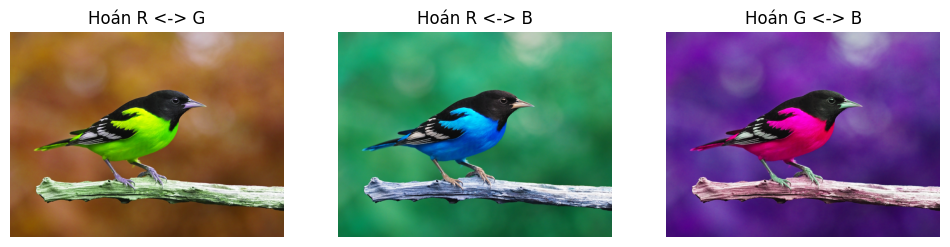

In [16]:
#Cau 2

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = iio.imread('bird.png')

#Hoán đổi các kênh màu
# R <-> G
rg_swap = img.copy()
rg_swap[:, :, 0], rg_swap[:, :, 1] = img[:, :, 1], img[:, :, 0]

# R <-> B
rb_swap = img.copy()
rb_swap[:, :, 0], rb_swap[:, :, 2] = img[:, :, 2], img[:, :, 0]

# G <-> B
gb_swap = img.copy()
gb_swap[:, :, 1], gb_swap[:, :, 2] = img[:, :, 2], img[:, :, 1]

iio.imwrite('swap_rg.png', rg_swap)
iio.imwrite('swap_rb.png', rb_swap)
iio.imwrite('swap_gb.png', gb_swap)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(rg_swap)
plt.title("Hoán R <-> G")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rb_swap)
plt.title("Hoán R <-> B")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gb_swap)
plt.title("Hoán G <-> B")
plt.axis('off')

plt.show()

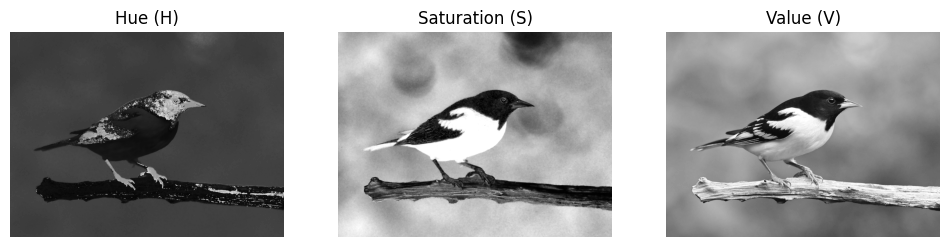

In [17]:
#Cau 3 

import numpy as np
import imageio.v2 as iio
from PIL import Image
import matplotlib.pyplot as plt

img = iio.imread('bird.png')  
img = img / 255.0  # Chuẩn hóa giá trị RGB về [0, 1]

#Chuyển đổi từng pixel sang HSV
hsv_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r, g, b = img[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        hsv_img[i, j] = [h, s, v]

#Tách 3 kênh H, S, V
H = hsv_img[:, :, 0]
S = hsv_img[:, :, 1]
V = hsv_img[:, :, 2]

#Chuyển về dạng 8-bit (0–255) để lưu
H_img = (H * 255).astype(np.uint8)
S_img = (S * 255).astype(np.uint8)
V_img = (V * 255).astype(np.uint8)

#Lưu ảnh từng kênh
Image.fromarray(H_img).save('hue.png')
Image.fromarray(S_img).save('saturation.png')
Image.fromarray(V_img).save('value.png')

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(H_img, cmap='gray')
plt.title("Hue (H)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(S_img, cmap='gray')
plt.title("Saturation (S)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(V_img, cmap='gray')
plt.title("Value (V)")
plt.axis('off')

plt.show()

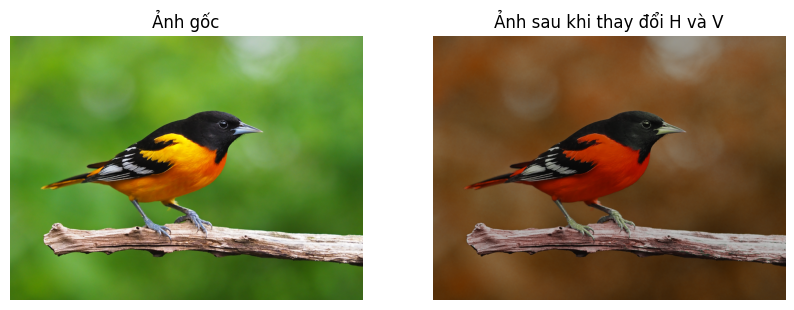

In [ ]:
#Câu 4

import numpy as np
import imageio.v2 as iio
from PIL import Image
import colorsys
import matplotlib.pyplot as plt


img = iio.imread('bird.png')
img = img / 255.0  # chuẩn hóa về [0,1]

# Chuyển RGB sang HSV
hsv_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r, g, b = img[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        # Thay đổi Hue và Value 
        h_new = h / 3.0  # Hnew = 1/3 * Hold
        v_new = v * 0.75  # Vnew = 3/4 * Vold
        # Giữ nguyên S
        hsv_img[i, j] = [h_new, s, v_new]

# Chuyển HSV trở lại RGB
rgb_img_new = np.zeros_like(img)
for i in range(hsv_img.shape[0]):
    for j in range(hsv_img.shape[1]):
        h, s, v = hsv_img[i, j]
        r, g, b = colorsys.hsv_to_rgb(h, s, v)
        rgb_img_new[i, j] = [r, g, b]

# Chuyển về 8-bit 
rgb_img_uint8 = (rgb_img_new * 255).clip(0, 255).astype(np.uint8)

# Lưu ảnh mới
Image.fromarray(rgb_img_uint8).save('bird_modified.png')

# Hiển thị ảnh gốc và ảnh mới
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_img_new)
plt.title('Ảnh sau khi thay đổi H và V')
plt.axis('off')

plt.show()


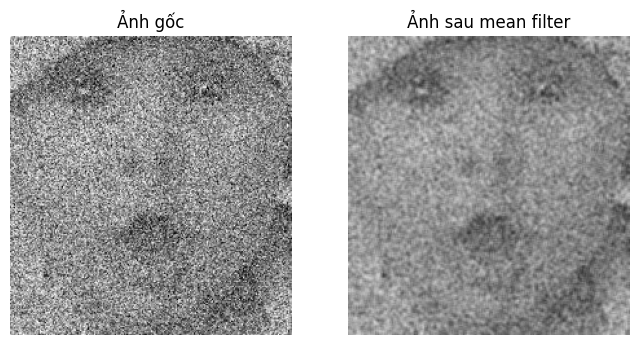

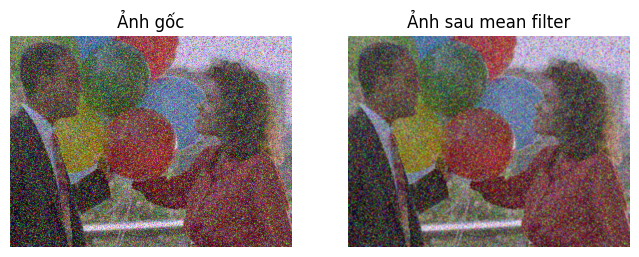

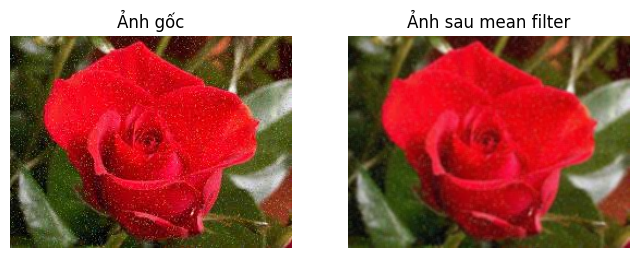

In [2]:
#Câu 5

import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Đường dẫn thư mục chứa ảnh
folder_path = 'exercise'

# Tạo thư mục lưu ảnh kết quả nếu chưa tồn tại
output_folder = 'exercise_filtered'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Hàm mean filter (lọc trung bình)
def mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

# Lấy danh sách các file ảnh trong thư mục
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

for file_name in image_files:
    # Đọc ảnh màu
    img_path = os.path.join(folder_path, file_name)
    img = cv2.imread(img_path)
    
    # Áp dụng mean filter
    filtered_img = mean_filter(img, kernel_size=3)
    
    # Lưu ảnh kết quả
    output_path = os.path.join(output_folder, 'filtered_' + file_name)
    cv2.imwrite(output_path, filtered_img)
    
    # Hiển thị ảnh gốc và ảnh lọc
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Ảnh gốc')
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    plt.title('Ảnh sau mean filter')
    plt.axis('off')
    plt.show()
